In [1]:
from pathlib import Path

import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itables import show

In [4]:
final_results = pd.read_parquet("./final_metrics/final_results.parquet")
show(final_results)

In [5]:
conn = duckdb.connect()
sns.set_theme(style="darkgrid")

In [6]:
conn.query("SELECT * FROM final_results WHERE algorithm = 'pagerank' AND dataset = 'epinions1';")

┌───────────┬───────────┬───────────┬──────────┬────────────┐
│  runtime  │ algorithm │  dataset  │ num_cpus │ amount_ram │
│  varchar  │  varchar  │  varchar  │  int64   │  varchar   │
├───────────┼───────────┼───────────┼──────────┼────────────┤
│ 65.491422 │ pagerank  │ epinions1 │        1 │ 128M       │
│ 67.001254 │ pagerank  │ epinions1 │        1 │ 258M       │
│ 8.886656  │ pagerank  │ epinions1 │        1 │ 512M       │
│ 5.358208  │ pagerank  │ epinions1 │        2 │ 1G         │
│ 5.311068  │ pagerank  │ epinions1 │        4 │ 2G         │
│ 5.530806  │ pagerank  │ epinions1 │        6 │ 3G         │
└───────────┴───────────┴───────────┴──────────┴────────────┘

In [7]:
def select_plot(dataset: str, algorithm: str) -> pd.DataFrame:
    return conn.execute("""
SELECT algorithm, dataset, num_cpus || 'cpu_' || amount_ram AS resources, CAST(runtime AS FLOAT) AS runtime
FROM final_results
WHERE dataset = ? AND algorithm = ?
ORDER BY num_cpus, amount_ram;
""", 
        (dataset, algorithm)
    ).df()

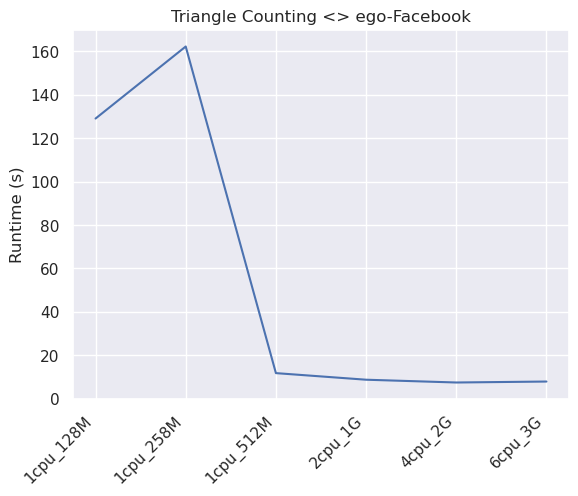

In [8]:
pagerank_facebook = select_plot('facebook', 'trianglecounting')
sns.lineplot(x='resources', y='runtime', data=pagerank_facebook)
plt.title("Triangle Counting <> ego-Facebook")
plt.xlabel("")
plt.ylabel("Runtime (s)")
plt.xticks(rotation=45, ha='right')
plt.show()

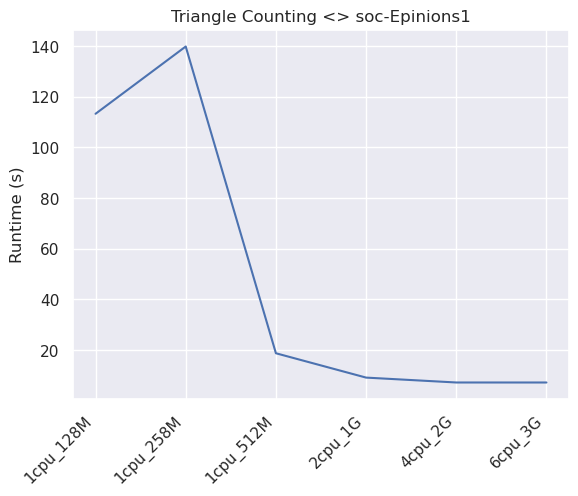

In [9]:
pagerank_epinions1 = select_plot('epinions1', 'trianglecounting')
sns.lineplot(x='resources', y='runtime', data=pagerank_epinions1)
plt.title("Triangle Counting <> soc-Epinions1")
plt.xlabel("")
plt.ylabel("Runtime (s)")
plt.xticks(rotation=45, ha='right')
plt.show()

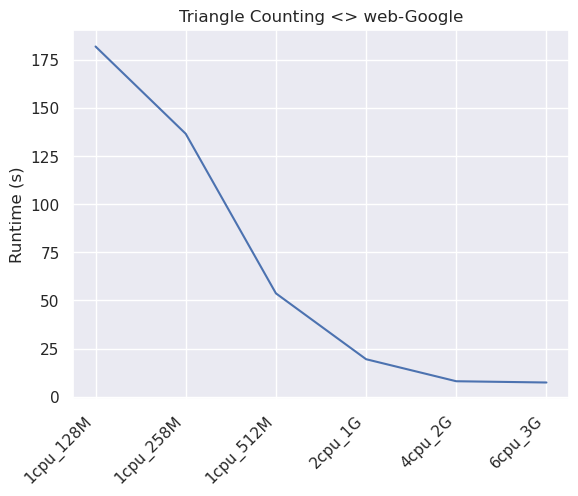

In [10]:
pagerank_google = select_plot('google', 'trianglecounting')
sns.lineplot(x='resources', y='runtime', data=pagerank_google)
plt.title("Triangle Counting <> web-Google")
plt.xlabel("")
plt.ylabel("Runtime (s)")
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
connectedcomponents_facebook = select_plot('facebook', 'connectedcomponents')
trianglecounting_facebook = select_plot('facebook', 'trianglecounting')

/tmp/ipykernel_3126/3031591281.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=4)
/tmp/ipykernel_3126/3031591281.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3126/3031591281.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3126/3031591281.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


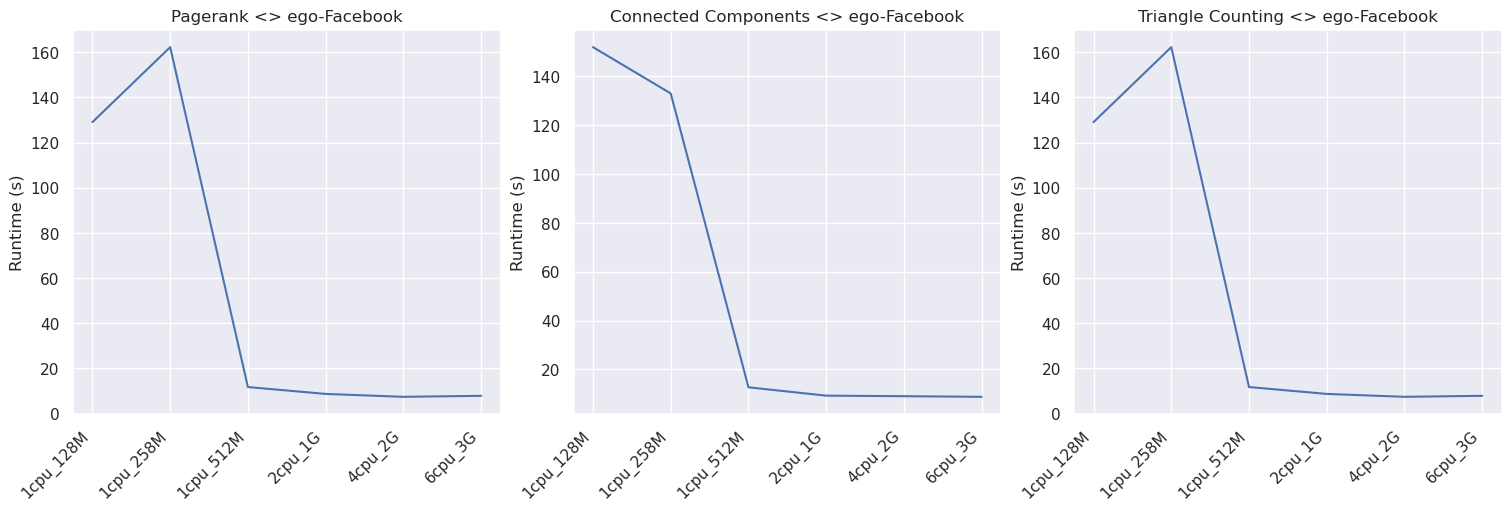

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
plt.subplots_adjust(wspace=4)

axes[0].set_title("Pagerank <> ego-Facebook")
pagerank_epinions1 = select_plot('facebook', 'pagerank')
sns.lineplot(ax=axes[0], x='resources', y='runtime', data=pagerank_facebook)

axes[1].set_title("Connected Components <> ego-Facebook")
connectedcomponents_epinions1 = select_plot('facebook', 'connectedcomponents')
sns.lineplot(ax=axes[1], x='resources', y='runtime', data=connectedcomponents_facebook)

axes[2].set_title("Triangle Counting <> ego-Facebook")
trianglecounting_epinions1 = select_plot('facebook', 'trianglecounting')
sns.lineplot(ax=axes[2], x='resources', y='runtime', data=trianglecounting_facebook)

for i in range(3):
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Runtime (s)")
    axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
plt.show()

/tmp/ipykernel_3126/1215976250.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=4)
/tmp/ipykernel_3126/1215976250.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3126/1215976250.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3126/1215976250.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


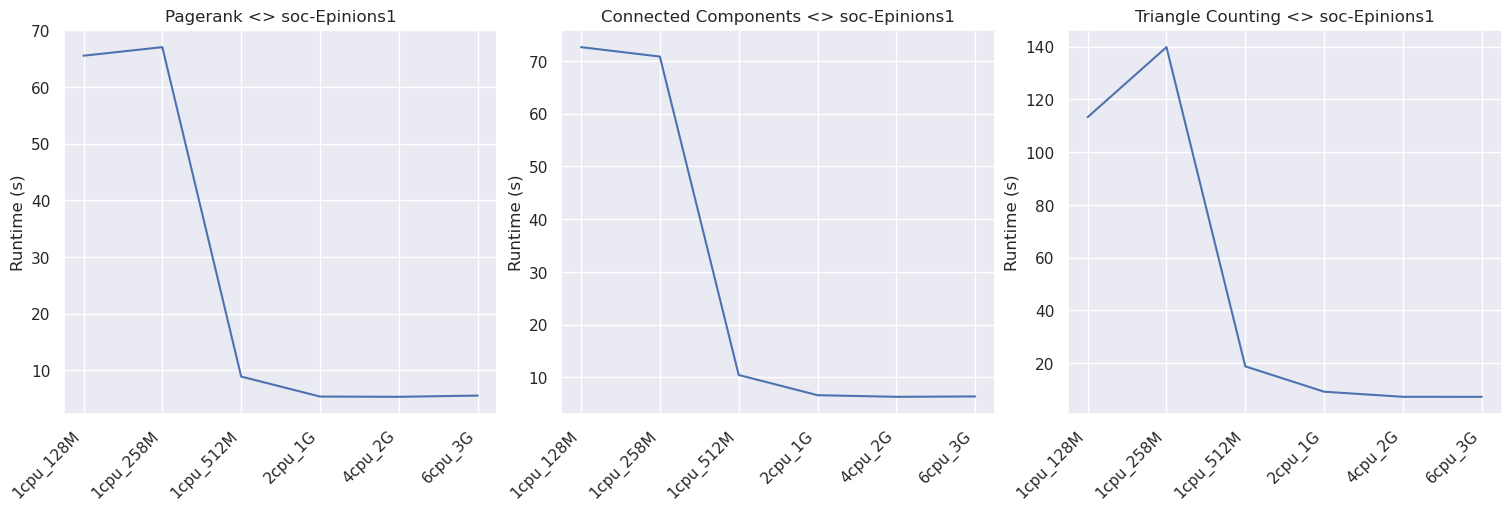

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
plt.subplots_adjust(wspace=4)

axes[0].set_title("Pagerank <> soc-Epinions1")
pagerank_epinions1 = select_plot('epinions1', 'pagerank')
sns.lineplot(ax=axes[0], x='resources', y='runtime', data=pagerank_epinions1)

axes[1].set_title("Connected Components <> soc-Epinions1")
connectedcomponents_epinions1 = select_plot('epinions1', 'connectedcomponents')
sns.lineplot(ax=axes[1], x='resources', y='runtime', data=connectedcomponents_epinions1)

axes[2].set_title("Triangle Counting <> soc-Epinions1")
trianglecounting_epinions1 = select_plot('epinions1', 'trianglecounting')
sns.lineplot(ax=axes[2], x='resources', y='runtime', data=trianglecounting_epinions1)

for i in range(3):
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Runtime (s)")
    axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
plt.show()

In [24]:
connectedcomponents_google = select_plot('google', 'connectedcomponents')
trianglecounting_google = select_plot('google', 'trianglecounting')

/tmp/ipykernel_3126/14062228.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=4)
/tmp/ipykernel_3126/14062228.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3126/14062228.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_3126/14062228.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


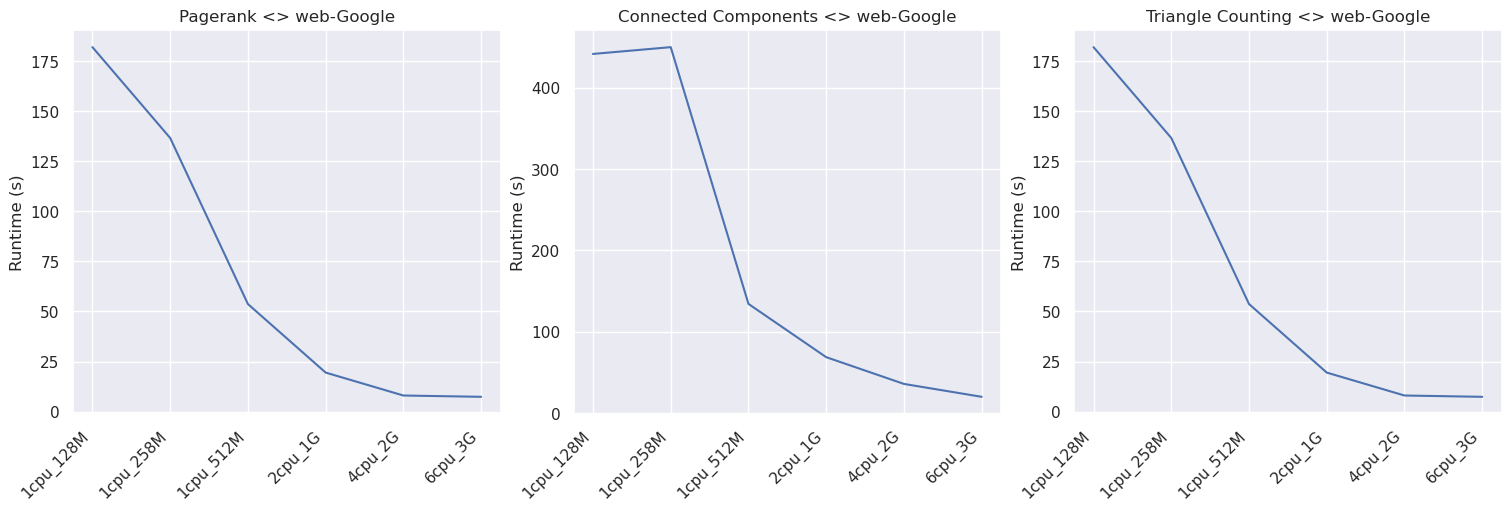

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
plt.subplots_adjust(wspace=4)

axes[0].set_title("Pagerank <> web-Google")
pagerank_epinions1 = select_plot('google', 'pagerank')
sns.lineplot(ax=axes[0], x='resources', y='runtime', data=pagerank_google)

axes[1].set_title("Connected Components <> web-Google")
connectedcomponents_epinions1 = select_plot('google', 'connectedcomponents')
sns.lineplot(ax=axes[1], x='resources', y='runtime', data=connectedcomponents_google)

axes[2].set_title("Triangle Counting <> web-Google")
trianglecounting_epinions1 = select_plot('google', 'trianglecounting')
sns.lineplot(ax=axes[2], x='resources', y='runtime', data=trianglecounting_google)

for i in range(3):
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Runtime (s)")
    axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
plt.show()

In [12]:
datasets = pd.DataFrame({"dataset_name": ['ego-Facebook', 'soc-Epinions1', 'web-Google'], 'nodes': [4039, 75879, 875713], 'edges': [88234, 508837, 5105039], 'descriptions': [
    "Social circles from Facebook", 
    "Who-trusts-whom network of Epinions.com",
    "Web graph from Google",
]})
show(datasets)

In [13]:
algorithms = pd.DataFrame({"algorithm_name": ['Pagerank', "Connected Components", 'Triangle Counting']})
show(algorithms)

algorithm_name
Loading ITables v2.2.5 from the internet... (need help?)


In [14]:
graphchi_compare = conn.query("""
SELECT algorithm, dataset, num_cpus, amount_ram, CAST(runtime AS FLOAT) AS runtime
FROM final_results
WHERE dataset = 'epinions1' AND num_cpus = 2 
""").df()
show(graphchi_compare)

In [16]:
graphchi_compare = conn.query("""
SELECT algorithm, dataset, num_cpus, amount_ram, CAST(runtime AS FLOAT) AS runtime
FROM final_results
WHERE dataset = 'epinions1' AND algorithm = 'pagerank'
""").df()
show(graphchi_compare)